In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("ABC Company.xlsx - Sheet1.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [15]:

df['height'] = np.random.randint(150, 181, size=len(df))
print("\n'height' column after preprocessing:")
print(df['height'].head())
print(f"Min height: {df['height'].min()}, Max height: {df['height'].max()}")



'height' column after preprocessing:
0    170
1    165
2    167
3    152
4    162
Name: height, dtype: int32
Min height: 150, Max height: 180


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB



Employee Distribution by Team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage Split by Team:
Team
New Orleans Pelicans      4.148472


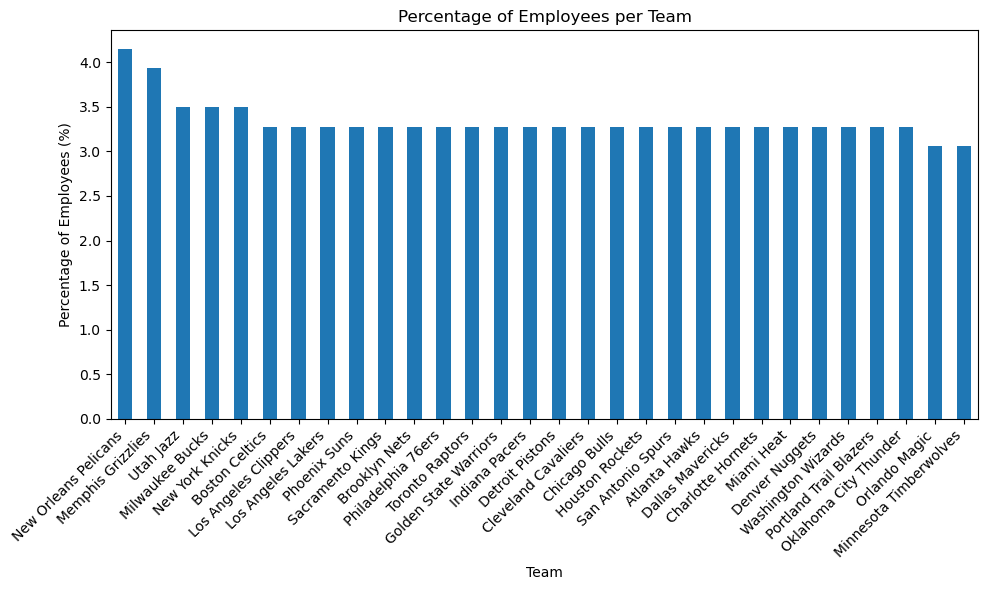

In [16]:

team_distribution = df['Team'].value_counts()
total_employees = len(df)
team_percentage = (team_distribution / total_employees) * 100

print("\nEmployee Distribution by Team:")
print(team_distribution)
print("\nPercentage Split by Team:")
print(team_percentage)


plt.figure(figsize=(10, 6))
team_percentage.plot(kind='bar')
plt.title('Percentage of Employees per Team')
plt.xlabel('Team')
plt.ylabel('Percentage of Employees (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Employee Segregation by Position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


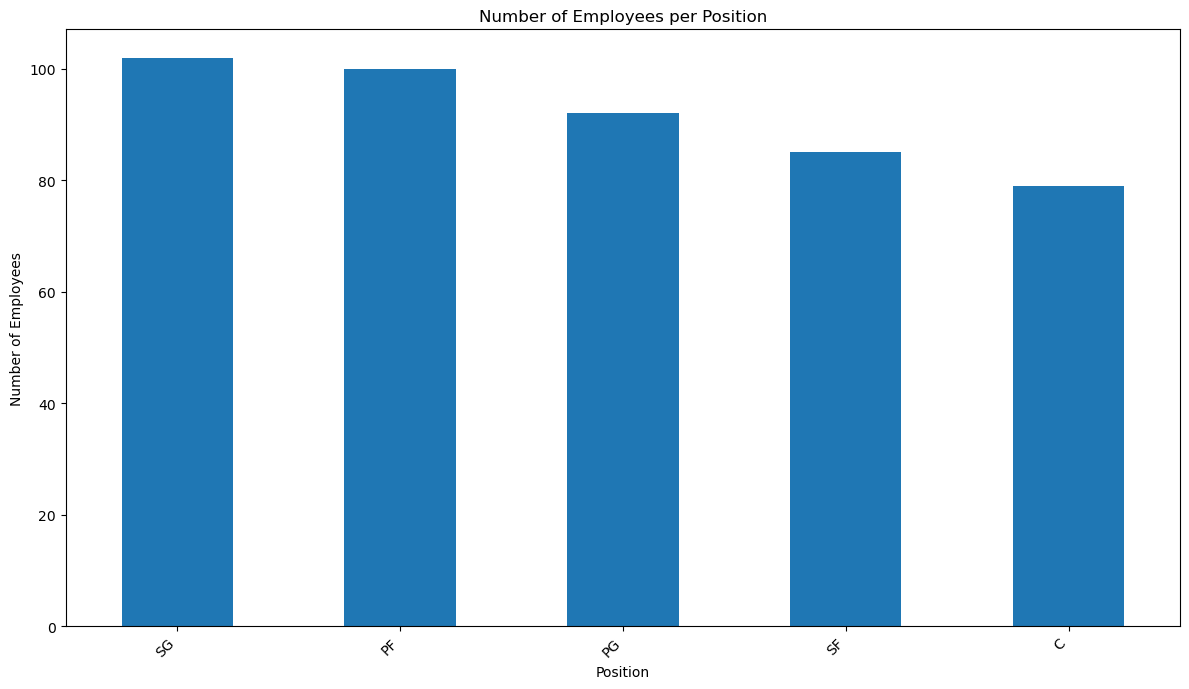

In [17]:

position_segregation = df['Position'].value_counts()
print("\nEmployee Segregation by Position:")
print(position_segregation)


plt.figure(figsize=(12, 7))
position_segregation.plot(kind='bar')
plt.title('Number of Employees per Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Age Group Distribution:
Age_Group
18-24    154
25-34    272
35-44     32
45-54      0
55-64      0
65-74      0
Name: count, dtype: int64

Predominant Age Group: 25-34


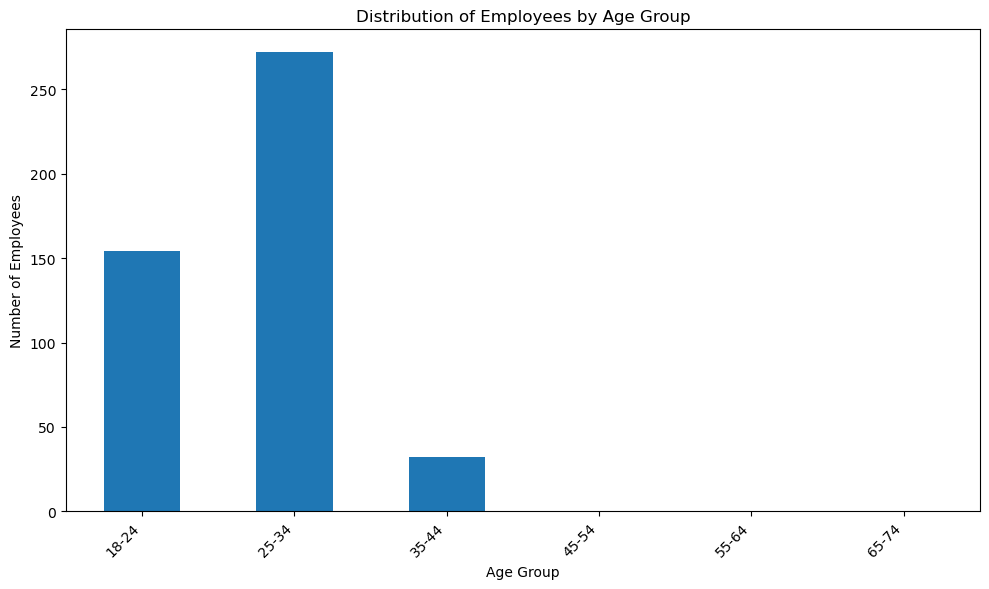

In [41]:

bins=[18,25,35,45,55,65,75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_distribution = df['Age_Group'].value_counts().sort_index()
print("\nAge Group Distribution:")
print(age_group_distribution)

predominant_age_group = age_group_distribution.idxmax()
print(f"\nPredominant Age Group: {predominant_age_group}")

# Visualization for Task 3 (Bar Chart)
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Total Salary Expenditure by Team:
Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota 

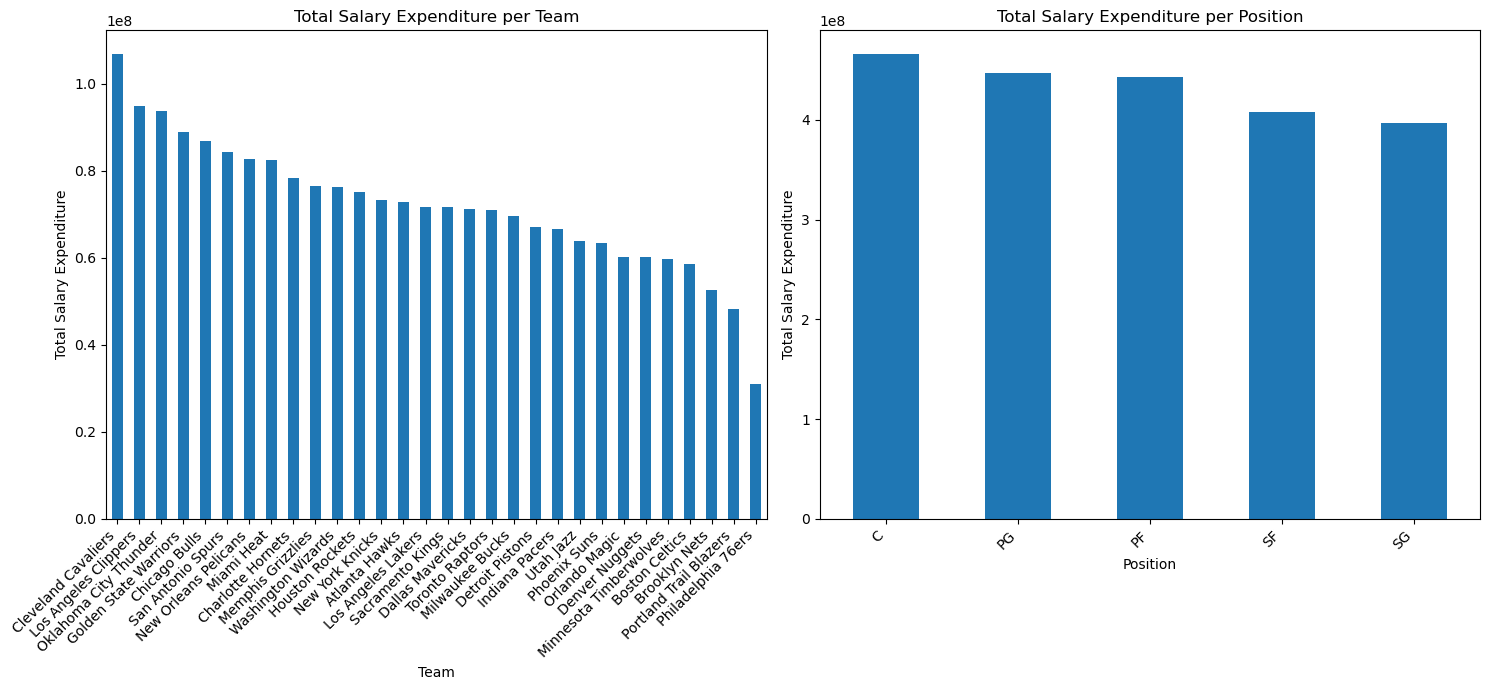

In [49]:
if all(col in df.columns for col in ['Team', 'Position', 'Salary']):
    team_salary_expenditure = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
    position_salary_expenditure = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

    print("\nTotal Salary Expenditure by Team:")
    print(team_salary_expenditure)
    highest_team = team_salary_expenditure.index[0]
    highest_team_value = team_salary_expenditure.iloc[0]
    print(f"\nTeam with Highest Salary Expenditure: {highest_team} (Expenditure: {highest_team_value:,.2f})")


    print("\nTotal Salary Expenditure by Position:")
    print(position_salary_expenditure)
    highest_position = position_salary_expenditure.index[0]
    highest_position_value = position_salary_expenditure.iloc[0]
    print(f"\nPosition with Highest Salary Expenditure: {highest_position} (Expenditure: {highest_position_value:,.2f})")
    
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    team_salary_expenditure.plot(kind='bar')
    plt.title('Total Salary Expenditure per Team')
    plt.xlabel('Team')
    plt.ylabel('Total Salary Expenditure')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    position_salary_expenditure.plot(kind='bar')
    plt.title('Total Salary Expenditure per Position')
    plt.xlabel('Position')
    plt.ylabel('Total Salary Expenditure')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()
else:
    print("\nWarning: One or more of 'Team', 'Position', 'Salary' columns not found for Task 4.")



In [50]:
correlation = df['Age'].corr(df['Salary'])
print(f"\nCorrelation between Age and Salary: {correlation:.2f}")


Correlation between Age and Salary: 0.21
